## DATA CLEANING

In [1]:
#import all libraries
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
#import dataset
housedata = pd.read_csv("/Users/Shen/Documents/Flatiron/Final_Project_Phase_2/data/kc_house_data.csv")

In [3]:
#take a look at the data features
housedata.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [4]:
housedata.shape

(30155, 25)

In [5]:
#review data type for later cleaning
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [6]:
#drop nans
housedata.isna().sum().sort_values(ascending=False)

heat_source      32
sewer_system     14
long              0
nuisance          0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
condition         0
view              0
lat               0
grade             0
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
id                0
dtype: int64

In [7]:
#drop nans
housedata=housedata.dropna()

In [8]:
#convert date dtype to datetime
housedata['date']=pd.to_datetime(housedata['date'])
housedata['date'].dtype

dtype('<M8[ns]')

In [9]:
housedata['price'].describe().round(2)

count       30111.00
mean      1108970.65
std        896515.83
min         27360.00
25%        649236.00
50%        860000.00
75%       1300000.00
max      30750000.00
Name: price, dtype: float64

In [10]:
#identify price outliers
price=housedata.loc[housedata['price']>5000000.00]

In [11]:
#drop price outliers above 5m
housedata = housedata[housedata['price'] < 5000000.00]

In [12]:
#clean up datatype - 'bedrooms' to float
housedata['bedrooms'] = housedata['bedrooms'].astype(float)

In [13]:
housedata['bedrooms'].value_counts()

3.0     12705
4.0      9526
2.0      3913
5.0      2730
6.0       477
1.0       376
7.0        75
0.0        38
8.0        37
9.0        14
10.0        3
11.0        1
13.0        1
Name: bedrooms, dtype: int64

In [14]:
#drop bedrooms outliers - above 8 and 0.0
housedata = housedata[housedata['bedrooms'] < 8.0]


In [15]:
#identify sqftliving outliers
housedata['sqft_living'].describe()

count    29840.000000
mean      2090.666287
std        925.766474
min          3.000000
25%       1410.000000
50%       1910.000000
75%       2600.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [16]:
#identify sqftliving outliers > 5000  - 251 houses
sqft_living=housedata.loc[housedata['sqft_living']>5000.00]
sqft_living['sqft_living'].count()

251

In [17]:
#drop sqftliving outliers > 5000  - 251 houses
housedata = housedata[housedata['sqft_living'] < 5000.00]


In [18]:
#find unique values for each column 
housedata_uniques = housedata.apply(lambda x: x.unique())

In [19]:
#Datacleaning - separate zip out of address by splitting address by ","
housedata[['address','city','state and zip','country','addresother','addressother2']]=housedata['address'].str.split(',', expand=True)

In [20]:
#Datacleaning - separate zip out of "state and zip" by extracting zip code
import re

In [21]:
housedata['zip']=housedata['state and zip'].apply(lambda x: re.sub("[^0-9]", "", x))

In [22]:
#zip column created and remove all records outside of king county - the zipcodes that are not starting with "98"
housedata['zip']=housedata['zip'].astype(str)
housedata['zip']=housedata['zip'].str.strip()
housedata['kingscounty']=housedata['zip'].map(lambda x:x.startswith('98'))

In [23]:
housedata['kingscounty'].value_counts()

True     28685
False      900
Name: kingscounty, dtype: int64

In [24]:
housedata = housedata[housedata['kingscounty'] != False]

In [25]:
#end of cleaning addresses + leave all king county recors
housedata.kingscounty.value_counts()

True    28685
Name: kingscounty, dtype: int64

In [26]:
#88 zipcodes remained
len(housedata.zip.unique())

88

In [27]:
#examine the corr between features
housedata.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,kingscounty
id,1.000000,-0.024539,-0.000095,-0.000766,-0.014516,-0.117270,0.037784,-0.009018,-0.012116,0.000979,-0.038132,0.025867,-0.027873,0.001296,0.012002,NaN
price,-0.024539,1.000000,0.325609,0.482332,0.618722,0.074800,0.232343,0.540825,0.200994,0.259770,0.278057,0.109599,0.086264,0.379134,0.109082,NaN
bedrooms,-0.000095,0.325609,1.000000,0.579859,0.646703,-0.011917,0.183124,0.533688,0.214607,0.305181,0.168688,0.183282,0.004463,-0.027830,0.142617,NaN
bathrooms,-0.000766,0.482332,0.579859,1.000000,0.753833,0.013700,0.430677,0.640634,0.211350,0.440821,0.291951,0.468965,0.037110,0.031785,0.185946,NaN
sqft_living,-0.014516,0.618722,0.646703,0.753833,1.000000,0.091172,0.361616,0.864461,0.272582,0.485297,0.361587,0.343879,0.031246,0.029581,0.256106,NaN
sqft_lot,-0.117270,0.074800,-0.011917,0.013700,0.091172,1.000000,-0.028351,0.102921,-0.010055,0.066604,0.147707,0.004584,0.009094,-0.078929,0.178973,NaN
floors,0.037784,0.232343,0.183124,0.430677,0.361616,-0.028351,1.000000,0.518839,-0.270515,0.170694,0.113785,0.525767,-0.017488,0.042347,0.087432,NaN
sqft_above,-0.009018,0.540825,0.533688,0.640634,0.864461,0.102921,0.518839,1.000000,-0.166746,0.537837,0.271880,0.446283,0.001659,-0.048086,0.363703,NaN
sqft_basement,-0.012116,0.200994,0.214607,0.211350,0.272582,-0.010055,-0.270515,-0.166746,1.000000,-0.027224,0.180353,-0.251365,0.050144,0.189277,-0.234975,NaN
sqft_garage,0.000979,0.259770,0.305181,0.440821,0.485297,0.066604,0.170694,0.537837,-0.027224,1.000000,0.195021,0.497235,-0.107039,-0.143511,0.382138,NaN


In [28]:
#remove columns will not be used in the analysis later on
housedatanew=housedata.drop(['yr_renovated','kingscounty','addresother','addressother2','state and zip'],axis=1)

In [29]:
#change waterfront column values to numerical values
housedatanew['waterfront']=housedatanew['waterfront'].apply(lambda x: 1 if x== "YES" else 0)

In [30]:
#change waterfront column values to numerical values
housedatanew['waterfront']=housedatanew['waterfront'].astype(int)

In [31]:
#change waterfront column values to numerical values
housedatanew['waterfront'].value_counts()

0    28270
1      415
Name: waterfront, dtype: int64

In [32]:
#change greenbelt and nuisance column values to numerical values
housedatanew['greenbelt']=housedatanew['greenbelt'].apply(lambda x: 1 if x=="YES" else 0)
housedatanew['nuisance']=housedatanew['nuisance'].apply(lambda x: 1 if x=="YES" else 0)

In [33]:
#change greenbelt and nuisance column values to numerical values

housedatanew['greenbelt']=housedatanew['greenbelt'].astype(int)
housedatanew['nuisance']=housedatanew['nuisance'].astype(int)

In [34]:
from sklearn.preprocessing import OrdinalEncoder

In [35]:
#change view column values (none average fair good excellent) to numerical values using cat recorder categories function

housedatanew['view']=housedatanew['view'].astype('category')

In [36]:
#change view column values to numerical values using cat recorder categories function

housedatanew['view'].dtype

CategoricalDtype(categories=['AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE'], ordered=False)

In [37]:
#change view column values to numerical values using cat recorder categories function

housedatanew['view']=housedatanew['view'].cat.reorder_categories(['NONE', 'AVERAGE', 'FAIR', 'GOOD','EXCELLENT'])

In [38]:
#change view column values to numerical values using cat recorder categories function

housedatanew['view']=housedatanew['view'].cat.codes

In [39]:
#change 'condition' column values  (poor, fair, good, average, verygood) to numerical values using cat recorder categories function

housedatanew['view']=housedatanew['view'].astype(int)

In [40]:
#change 'condition' column values  (poor, fair, good, average, verygood) to numerical values using cat recorder categories function

housedatanew['condition']=housedatanew['condition'].astype('category')

In [41]:
#change 'condition' column values  (poor, fair, good, average, verygood) to numerical values using cat recorder categories function

housedatanew['condition']=housedatanew['condition'].cat.reorder_categories(['Poor','Fair','Good','Average','Very Good'])

In [42]:
#change 'condition' column values  (poor, fair, good, average, verygood) to numerical values using cat recorder categories function

housedatanew['condition']=housedatanew['condition'].cat.codes

In [43]:
#change 'condition' column values  (poor, fair, good, average, verygood) to numerical values using cat recorder categories function

housedatanew['condition']=housedatanew['condition'].astype(int)

In [44]:
#change 'grade' column values  (substandard poor low pair low average...luxury) to numerical values using cat recorder categories function

housedatanew['grade'].value_counts()

7 Average        11527
8 Good            8818
9 Better          3536
6 Low Average     2840
10 Very Good      1230
5 Fair             384
11 Excellent       261
4 Low               46
12 Luxury           33
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [45]:
#change 'grade' column values  (substandard poor low pair low average...luxury) to numerical values using cat recorder categories function

housedatanew['grade']=housedatanew['grade'].astype('category')

In [46]:
#change 'grade' column values  (substandard poor low pair low average...luxury) to numerical values using cat recorder categories function

housedatanew['grade']=housedatanew['grade'].cat.reorder_categories(['2 Substandard','3 Poor','4 Low','5 Fair','6 Low Average','7 Average','8 Good','9 Better','10 Very Good','11 Excellent','12 Luxury'])

In [47]:
#change 'grade' column values  (substandard poor low pair low average...luxury) to numerical values using cat recorder categories function

housedatanew['grade']=housedatanew['grade'].cat.codes

In [48]:
#change 'grade' column values  (substandard poor low pair low average...luxury) to numerical values using cat recorder categories function

housedatanew['grade']=housedatanew['grade'].astype(int)

In [49]:
#align catcodes to the actual grading
housedatanew['grade']=np.array(housedatanew['grade'])+2

In [50]:
housedatanew['heat_source']=housedatanew['heat_source'].astype(str)

In [51]:
housedatanew['persqft']=housedatanew['price']/housedatanew['sqft_living']

# --------------------END OF DATA CLEANING

In [52]:
housedatanew.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'address',
       'lat', 'long', 'city', 'country', 'zip', 'persqft'],
      dtype='object')

###  Initial Data Insights

<AxesSubplot:xlabel='grade', ylabel='price'>

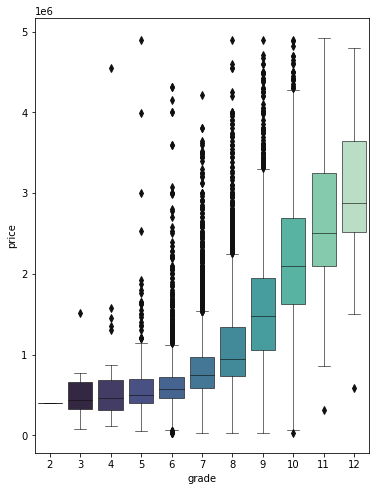

In [53]:
#boxplot grade vs price
fig, ax = plt.subplots(figsize = (6, 8))
sns.boxplot(data=housedatanew,x='grade',y='price',palette="mako",linewidth = 0.6)

<AxesSubplot:xlabel='condition', ylabel='price'>

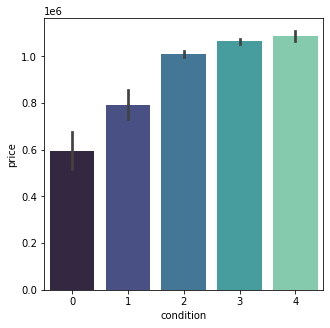

In [54]:
#bar plot condition vs price
fig, ax = plt.subplots(figsize = (5, 5))
sns.barplot(data=housedatanew,x='condition',y='price',palette="mako")

<function matplotlib.pyplot.show(close=None, block=None)>

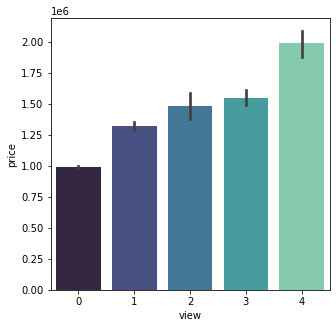

In [55]:
#bar plot view vs price
fig, ax = plt.subplots(figsize = (5, 5))
sns.barplot(data=housedatanew,x='view',y='price',palette="mako")
plt.show

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

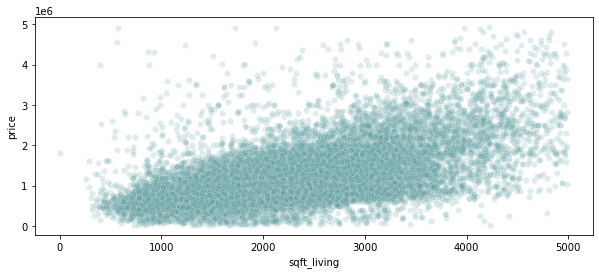

In [56]:
#scatter plot sqftliving vs price
fig, ax = plt.subplots(figsize = (10,4))
sns.scatterplot(data=housedatanew,x='sqft_living',y='price',color='cadetblue',alpha=.2)

<AxesSubplot:xlabel='yr_built', ylabel='condition'>

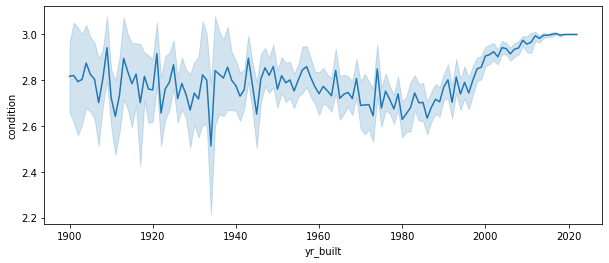

In [57]:
#lineplot yr built vs condition
fig, ax = plt.subplots(figsize = (10, 4))
sns.lineplot(data=housedatanew,x='yr_built',y='condition',palette='rocket')

<AxesSubplot:xlabel='waterfront', ylabel='sqft_living'>

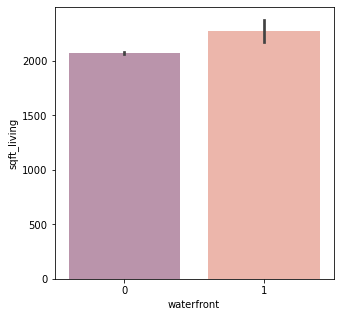

In [58]:
#barplot waterfront vs sqft_living
fig, ax = plt.subplots(figsize = (5, 5))
sns.barplot(data=housedatanew,x='waterfront',y='sqft_living',palette='rocket',alpha=.5)

<AxesSubplot:xlabel='price', ylabel='bedrooms'>

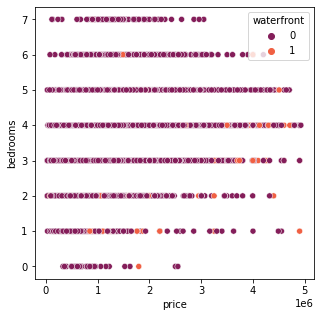

In [59]:
#scatter plot price bedrooms and waterfront
fig, ax = plt.subplots(figsize = (5, 5))
sns.scatterplot(data=housedatanew,x='price',y='bedrooms',hue='waterfront',palette='rocket')

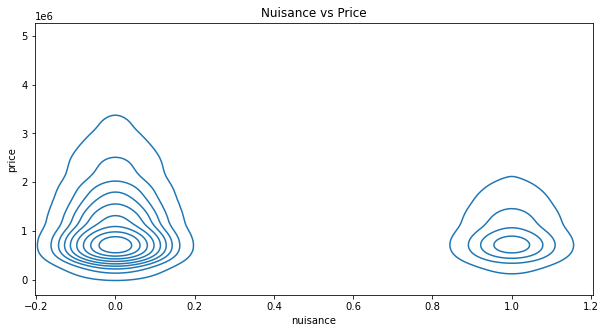

In [60]:
#kdeplot nuisance vs price
fig, ax = plt.subplots(figsize = (10, 5))
gf=sns.kdeplot(data=housedatanew,x='nuisance',y='price',palette='rocket')
plt.title("Nuisance vs Price")
plt.show()

Text(0.5, 1.0, 'Yr_Built vs Sqft_lot')

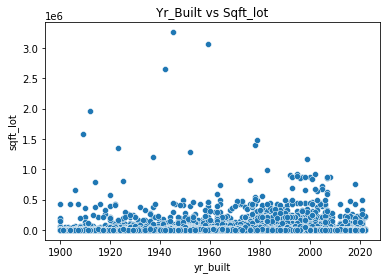

In [61]:
#scatter plot yr built and sqft lot
sns.scatterplot(x='yr_built',y='sqft_lot',data=housedatanew, palette ='rocket')
plt.title("Yr_Built vs Sqft_lot")

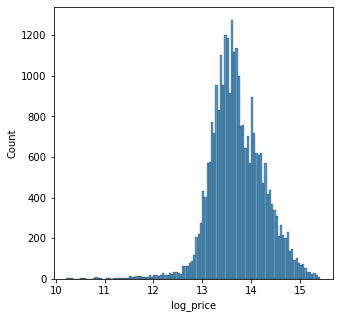

In [62]:
# log price to standardize
housedatanew['log_price']=np.log(housedatanew['price'])

fig, ax = plt.subplots(figsize = (5, 5))

ax = sns.histplot(data = housedatanew, x= housedatanew['log_price'])
plt.show();


In [63]:
np.exp(13.5)

729416.3698477013

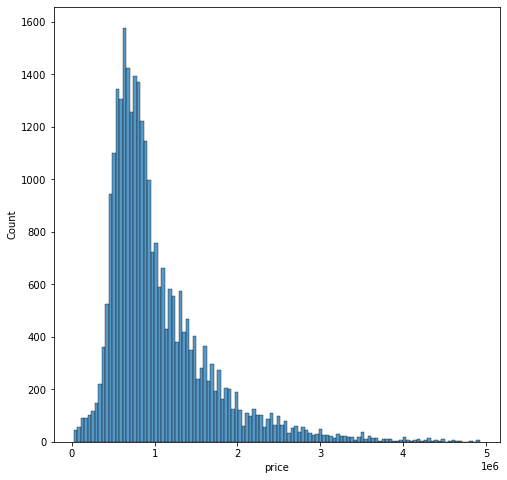

In [64]:
#visualize price distribution
fig, ax = plt.subplots(figsize = (8, 8))

ax = sns.histplot(data = housedatanew, x= housedatanew['price'])
plt.show();


<function matplotlib.pyplot.show(close=None, block=None)>

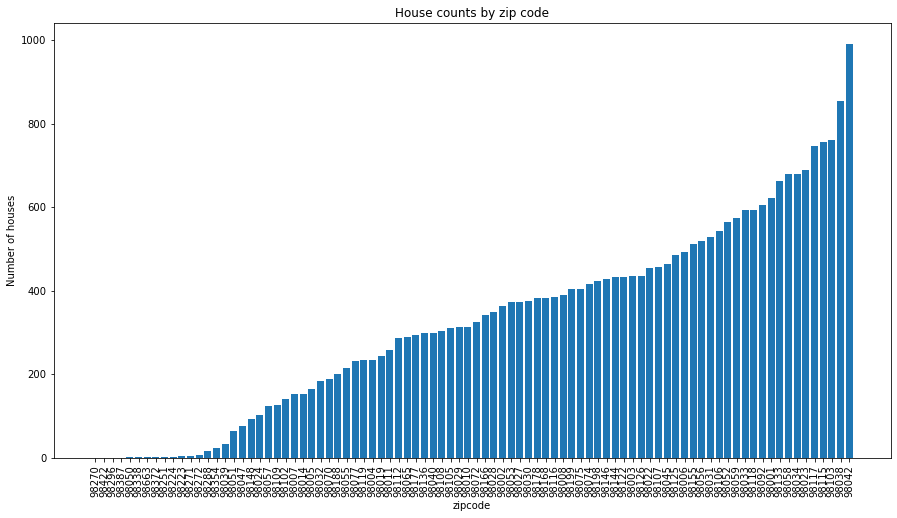

In [65]:
#house counts for each zip
x=housedatanew['zip'].value_counts().sort_values().index
y=housedatanew['zip'].value_counts().sort_values().values
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x,y)
ax.set_title('House counts by zip code')
ax.set_xlabel('zipcode')
ax.set_ylabel('Number of houses')

plt.xticks(rotation=90)


plt.show

In [66]:
#average price by zip
persqft_housetype=housedatanew.groupby('zip').agg({'price':'mean','sqft_living':'mean','bedrooms':'mean','bathrooms':'mean','waterfront':'mean','view':'mean','yr_built':'mean','grade':'mean','waterfront':'count','view':'count'}).round(2)
pricetable=persqft_housetype.sort_values(by = ('waterfront'),ascending = False)
pricetable=pricetable.reset_index()
pricetable['mostexpensivezip']=range(1,len(pricetable)+1)
pricetable

,zip,price,sqft_living,bedrooms,bathrooms,waterfront,view,yr_built,grade,mostexpensivezip
0,98042,668456.62,2129.77,3.54,2.33,991,991,1990.97,7.51,1
1,98038,804131.26,2218.01,3.48,2.46,855,855,1996.63,7.58,2
2,98103,1067443.52,1650.68,3.07,2.09,760,760,1956.75,7.42,3
3,98115,1161628.76,1862.63,3.19,2.04,755,755,1952.26,7.40,4
4,98117,1078119.51,1748.63,3.07,2.08,747,747,1955.39,7.37,5
...,...,...,...,...,...,...,...,...,...,...
83,98663,597450.00,960.00,2.00,2.50,2,2,2020.00,8.00,84
84,98270,2375000.00,3590.00,4.00,3.50,1,1,2006.00,9.00,85
85,98296,700000.00,2152.00,4.00,2.50,1,1,2009.00,8.00,86
86,98387,679950.00,1190.00,2.00,2.00,1,1,2022.00,7.00,87


In [67]:
#top 15 zipcodes with the highest view scores
view15= pricetable.nlargest(15, "view")

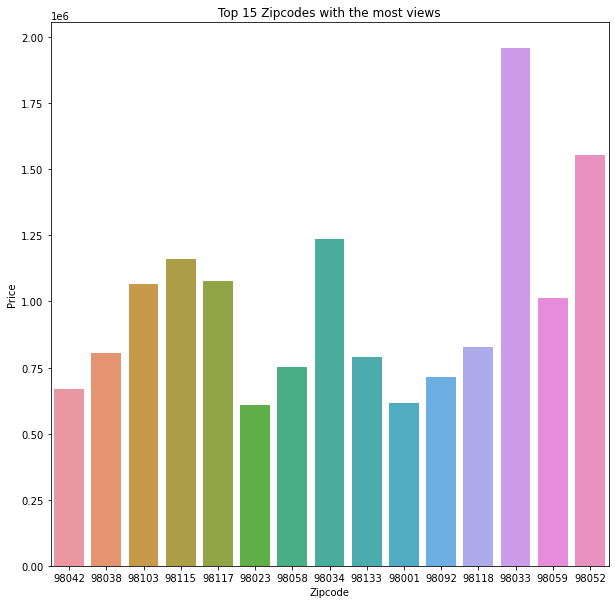

In [68]:
#top 15 zipcodes with the highest view scores - visualization

fig, ax = plt.subplots(figsize = (10, 10))
sns.barplot(data = view15,
            x = view15['zip'],
             y=view15['price'],
            ax = ax)
plt.xlabel("Zipcode")
plt.ylabel("Price")
plt.title("Top 15 Zipcodes with the most views")
plt.show();

## Base Line Modeling for All Houses

In [69]:
#creating coef sunmmary to examine the coef between the features below with price
heatmap_vac=housedatanew[['price','sqft_living','view','grade','waterfront','condition']]

In [70]:
#creating heatmap to examin the coef between the features below with price

feature_cols= ['view','waterfront','greenbelt','nuisance','grade','sqft_living']
X = housedatanew[feature_cols]
X_standard = X.apply(lambda x: (x - x.mean())/x.std())
y = housedatanew['price']
y_standard = (y - y.mean())/y.std()

In [71]:
import statsmodels.api as sm
X_aug = sm.add_constant(X_standard)
res = sm.OLS(y_standard, X_aug).fit()

In [72]:
res

In [73]:
#review weights for each feature
weights=res.params
weights

const         -8.673617e-19
view           1.311544e-01
waterfront     4.096339e-02
greenbelt      1.885904e-02
nuisance       4.202821e-02
grade          3.244387e-01
sqft_living    3.624522e-01
dtype: float64

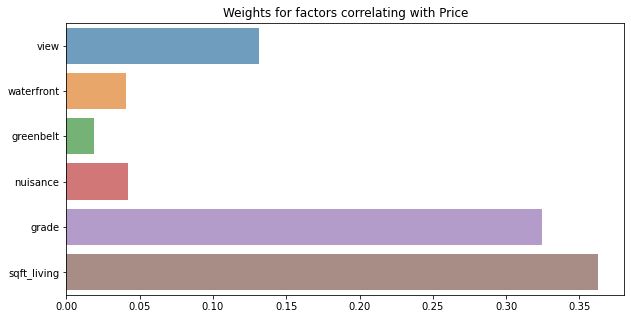

In [74]:
plt.figure(figsize=(10,5))
sns.barplot(y=weights[1::].index,x=weights[1::].values,alpha=0.7)
plt.title("Weights for factors correlating with Price")
plt.show()

In [75]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     4093.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:53:21   Log-Likelihood:                -31829.
No. Observations:               28685   AIC:                         6.367e+04
Df Residuals:                   28678   BIC:                         6.373e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.674e-19      0.004     -2e-16      1.000      -0.008       0.008
view            0.1312      0.005     27.011      0.000       0.122       0.141
waterfront      0.0410      0.005      8.602      0.000       0.032       0.050
greenbelt       0.0189      0.004      4.305      0.000       0.010       0.027
nuisance        0.0420      0.004      9.652      0.000       0.033       0.051
grade           0.3244      0.006     52.383      0.000       0.312       0.337
sqft_living     0.3625      0.006     58.312      0.000       0.350       0.375
==============================================================================
Omnibus:                     9206.091   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54087.553
Skew:                           1.420   Prob(JB):                         0.00
Kurtosis:                       9.098   Cond. No.                         2.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

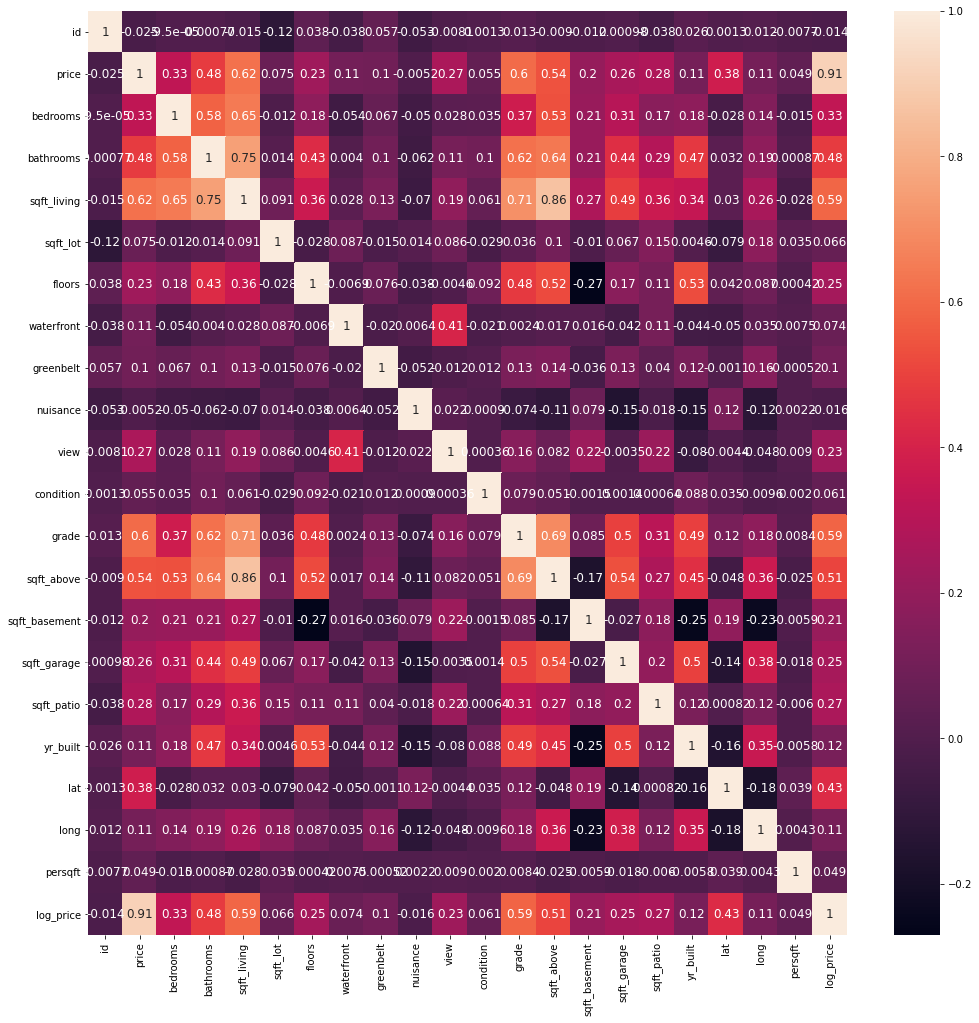

In [76]:
#using heatmap to validate the coef number
fig, ax = plt.subplots(figsize=(17,17)) 
sns.heatmap(housedatanew.corr(),annot=True,annot_kws={'size':12})


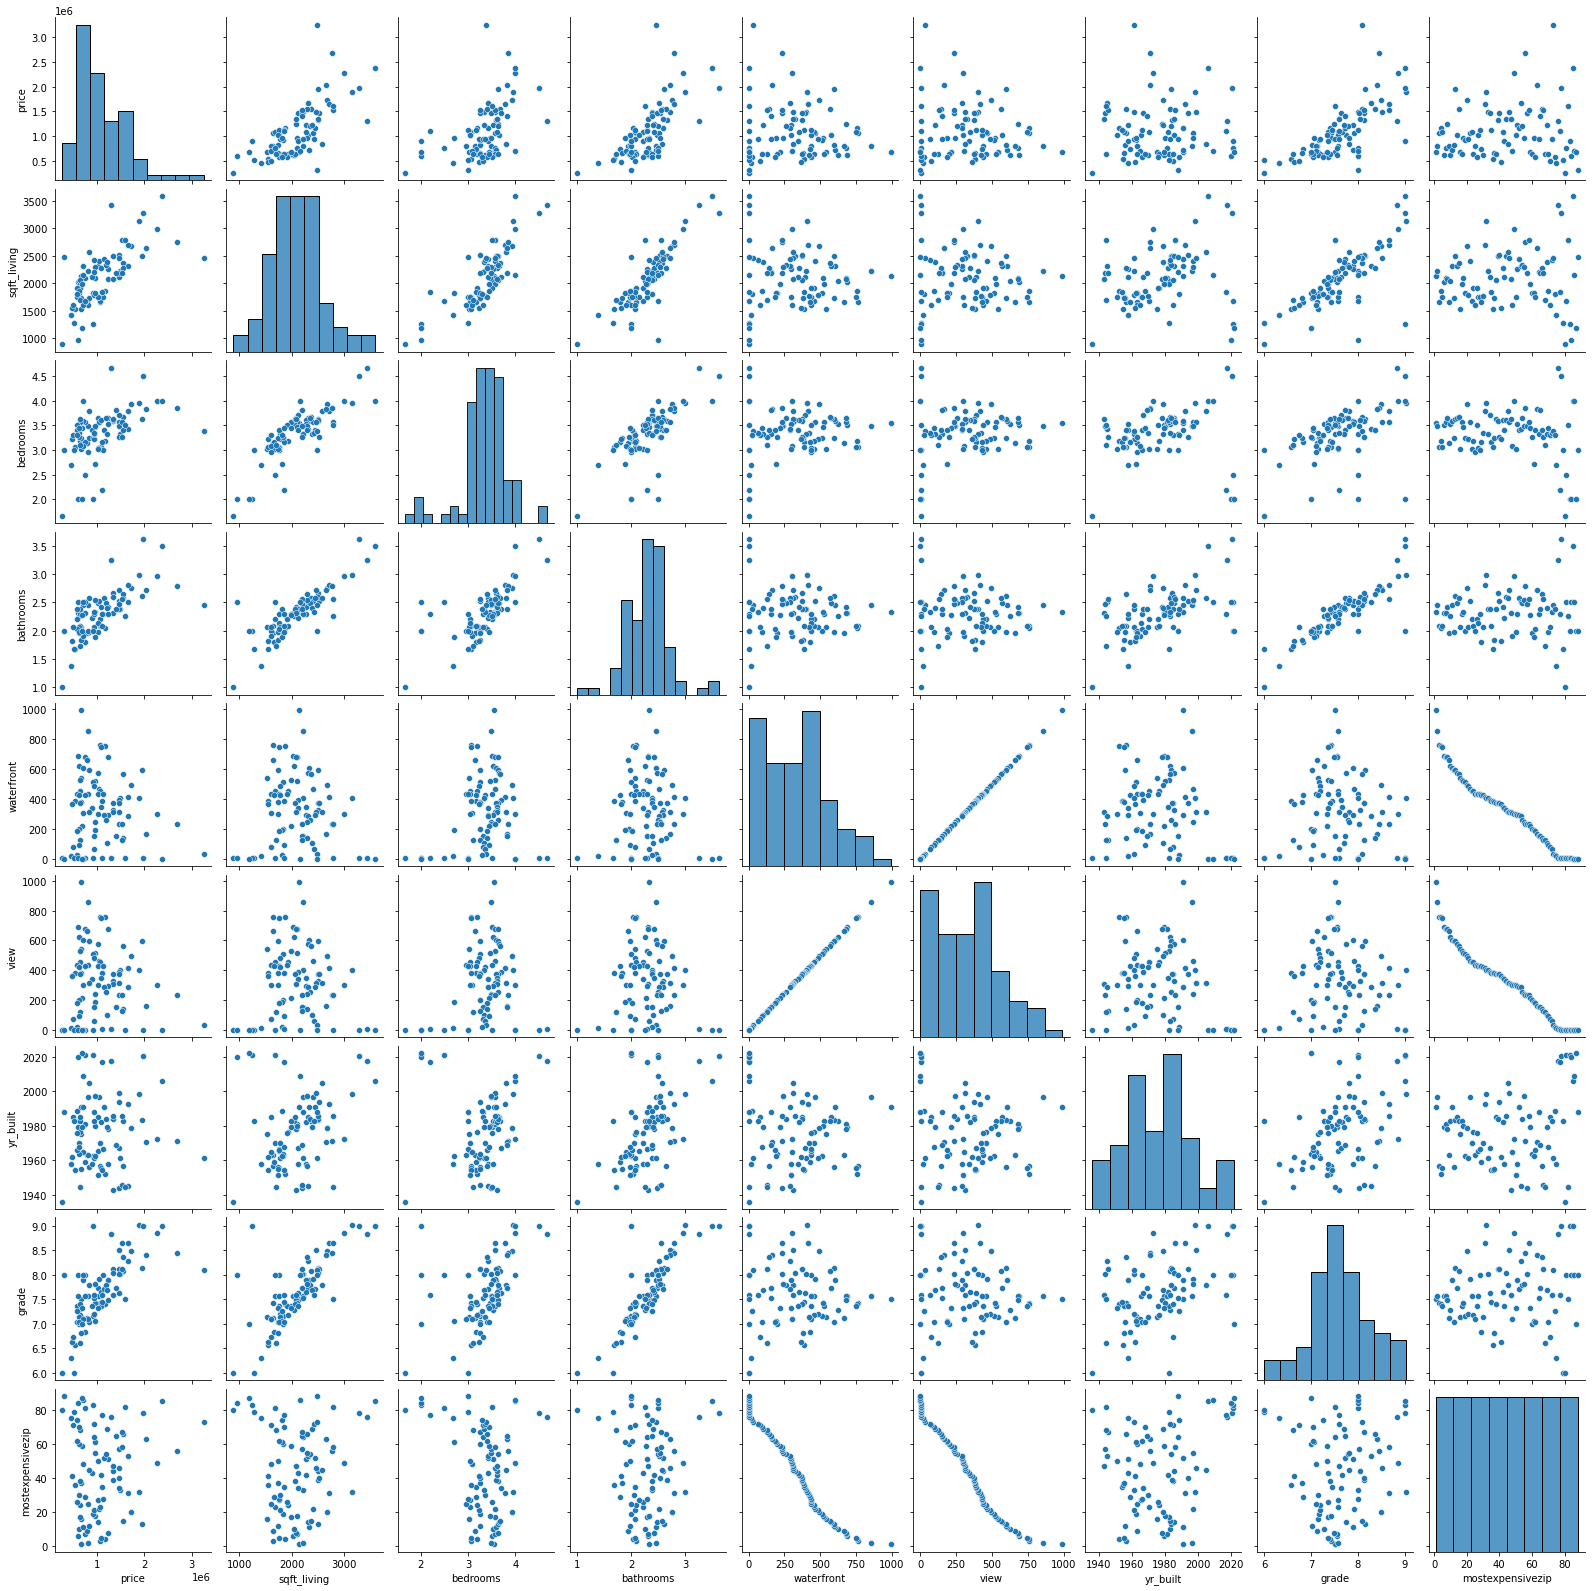

In [77]:
#plotting out the weights
sns.pairplot(pricetable)
plt.show()

In [78]:
#test modeling - first try - all columns without heatsource and sewer system
col_selector = ['zip','bedrooms','sqft_living','sqft_lot','floors','waterfront','greenbelt','view','condition','grade','sqft_patio','yr_built', 'bathrooms']
X = housedatanew[col_selector]
y = housedatanew['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

0.5064633014896209
0.49628485257520594


<AxesSubplot:ylabel='price'>

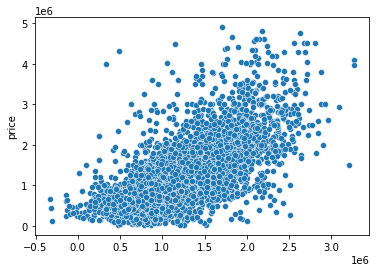

In [79]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
preds = lr.predict(X_test)
sns.scatterplot(preds,y_test)

In [80]:
list(zip(lr.coef_,X_train.columns))

[(-521.7297900077295, 'zip'),
 (-55483.291633337794, 'bedrooms'),
 (258.90124458598643, 'sqft_living'),
 (0.0074061627383343875, 'sqft_lot'),
 (20595.00582012207, 'floors'),
 (254140.92628818963, 'waterfront'),
 (89986.96670386188, 'greenbelt'),
 (76894.02914653401, 'view'),
 (18421.64603875926, 'condition'),
 (237839.57092609318, 'grade'),
 (41.696813638686706, 'sqft_patio'),
 (-5388.914213925569, 'yr_built'),
 (76143.28416863576, 'bathrooms')]

## Beginning of model testing for "Vacation Home"

#### Creating engineering feature of view/waterfront + no nuisance

In [81]:
#Import original dataframe, rename to vacation_housedata
vacation_housedata=housedatanew

In [82]:
vacation_housedata['Vacationgrade']=vacation_housedata['view']+vacation_housedata['waterfront']+vacation_housedata['greenbelt']

In [83]:
vacation_housedata['EnvironmentRank']= vacation_housedata['Vacationgrade'].apply(lambda x : 1 if x != 0 else 0)

In [84]:
vacation_housedata['EnvironmentRank'].value_counts()

0    24680
1     4005
Name: EnvironmentRank, dtype: int64

In [85]:
vacation_housedata=vacation_housedata[vacation_housedata['EnvironmentRank']!=0]

In [86]:
viewzip=vacation_housedata.groupby('zip')['Vacationgrade','price'].mean().round(3)
top15viewzip=viewzip.sort_values(by='Vacationgrade', ascending=False).head(15)
top15viewzip=top15viewzip.reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

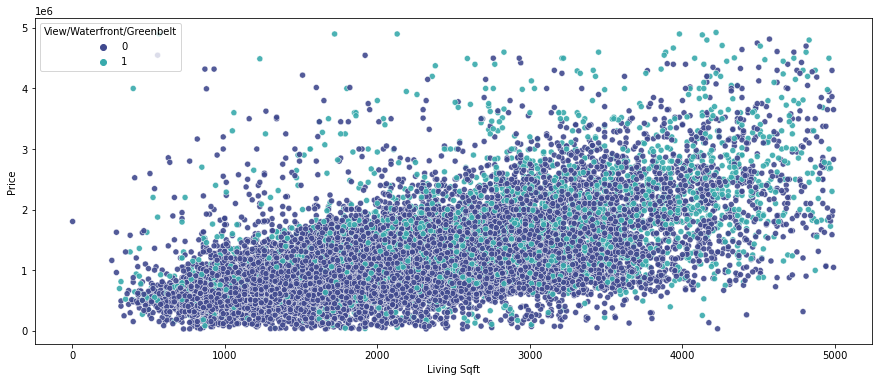

In [87]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.scatterplot(data=housedatanew,x='sqft_living',y='price',hue='EnvironmentRank',palette = 'mako',legend='full',alpha=.9)
ax.set(xlabel='Living Sqft', ylabel='Price')
plt.legend(title='View/Waterfront/Greenbelt', loc='upper left')
plt.show

In [88]:
top15viewzip['zip']=top15viewzip['zip'].astype(str)

In [89]:
top15view_housedata=vacation_housedata[vacation_housedata['zip'].isin(top15viewzip['zip'])]

In [90]:
top15view_housedata=top15view_housedata[top15view_housedata['zip']!=False]

In [91]:
counts=pd.DataFrame(top15view_housedata['zip'].value_counts(),columns=['zip',"counts"])

<Figure size 1440x432 with 0 Axes>

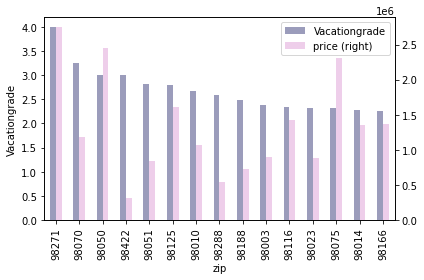

In [92]:

plt.figure(figsize=(20,6))

#populate bar graph to show the trend
top15viewzip.plot(secondary_y='price', x='zip', colormap = 'tab20b',kind='bar', ylabel="Vacationgrade", alpha=.5)
plt.tight_layout()

In [93]:
vacation_housedata.loc[vacation_housedata['zip']=='98271']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,address,lat,long,city,country,zip,persqft,log_price,Vacationgrade,EnvironmentRank
13294,1454600255,2022-05-23,2750000.0,3.0,3.5,3510,18543,1.0,0,0,...,12718 42nd Avenue Northeast,48.11054,-122.17517,Marysville,United States,98271,783.475783,14.827111,4,1


###### Vacation-Modeling First Run - 

####### including 'zip','bedrooms','sqft_living','sqft_lot','floors','waterfront','greenbelt','view','condition','grade','sqft_patio','yr_built', 
'bathrooms','sewer_system','heat_source','view','waterfront','greenbelt'

In [94]:
cols =['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system','sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 
       'lat', 'long', 'city', 'zip', 'persqft', 
       'Vacationgrade', 'EnvironmentRank']

In [95]:
col_selector = ['zip','bedrooms','sqft_living','sqft_lot','floors','waterfront','greenbelt','view','condition','grade','sqft_patio','yr_built', 'bathrooms','sewer_system','heat_source','waterfront','greenbelt']
vacX = vacation_housedata[col_selector]
vacy = np.log(vacation_housedata['price'])

vacX_train, vacX_test, vacy_train, vacy_test = train_test_split(vacX, vacy, test_size=0.30)

In [96]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')

ohe_train = ohe.fit_transform(vacX_train[['zip', 'heat_source', 'sewer_system']]).toarray()
ohe_test = ohe.transform(vacX_test[['zip', 'heat_source', 'sewer_system']]).toarray()

ohe_train = pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = vacX_train.index
ohe_test.index = vacX_test.index 

vacX_train = pd.concat([vacX_train, ohe_train],1)
vacX_test = pd.concat([vacX_test, ohe_test],1)
vacX_train

vacX_train.drop(columns =['zip', 'heat_source', 'sewer_system'], inplace = True)
vacX_test.drop(columns =['zip', 'heat_source', 'sewer_system'], inplace = True)

In [97]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(vacX_train)
vacX_standardized_train = ss.transform(vacX_train)
vacX_standardized_test = ss.transform(vacX_test)

vacX_standardized_train.mean(axis = 0)
vacX_standardized_train.std(axis = 0)

vacX_standardized_test.mean(axis = 0)
vacX_standardized_test.std(axis = 0)

lr.fit(vacX_train, vacy_train)

print(lr.score(vacX_test,vacy_test))

0.6587192772716308


0.646528529628593
0.6587192772716308


<AxesSubplot:ylabel='price'>

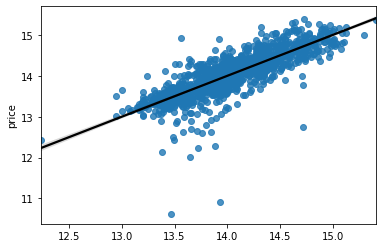

In [98]:
lr = LinearRegression()
lr.fit(vacX_train,vacy_train)
print(lr.score(vacX_train,vacy_train))
print(lr.score(vacX_test,vacy_test))
preds = lr.predict(vacX_test)
sns.regplot(preds,vacy_test,line_kws={'color':'black'})

###### Vaction-Modeling Run 2 - change sqft_living to sqft_above 

In [99]:
col_selector = ['bedrooms', 'bathrooms',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system','sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 
       'lat', 'long', 'city', 'zip', 'persqft']
vacX2 = vacation_housedata[col_selector]
vacy2 = vacation_housedata['price']

vacX2_train, vacX2_test, vacy2_train, vacy2_test = train_test_split(vacX2, vacy2, test_size=0.2)

In [100]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')

ohe_train = ohe.fit_transform(vacX2_train[['zip', 'heat_source', 'sewer_system','city']]).toarray()
ohe_test = ohe.transform(vacX2_test[['zip', 'heat_source', 'sewer_system','city']]).toarray()

ohe_train = pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = vacX2_train.index
ohe_test.index = vacX2_test.index 

vacX2_train = pd.concat([vacX2_train, ohe_train],1)
vacX2_test = pd.concat([vacX2_test, ohe_test],1)
vacX2_train

vacX2_train.drop(columns =['zip', 'heat_source', 'sewer_system','city'], inplace = True)
vacX2_test.drop(columns =['zip', 'heat_source', 'sewer_system','city'], inplace = True)

In [101]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(vacX2_train)
vacX2_standardized_train = ss.transform(vacX2_train)
vacX2_standardized_test = ss.transform(vacX2_test)

vacX2_standardized_train.mean(axis = 0)
vacX2_standardized_train.std(axis = 0)

vacX2_standardized_test.mean(axis = 0)
vacX2_standardized_test.std(axis = 0)

lr.fit(vacX2_train, vacy2_train)
lr.score(vacX2_test,vacy2_test)

0.8252022542153867

In [102]:
lr = LinearRegression()
lr.fit(vacX2_train, vacy2_train)
lr.score(vacX2_train,vacy2_train)
lr.score(vacX2_test,vacy2_test)

0.8252022542153867

0.8340184201782266
0.8252022542153867


<AxesSubplot:ylabel='price'>

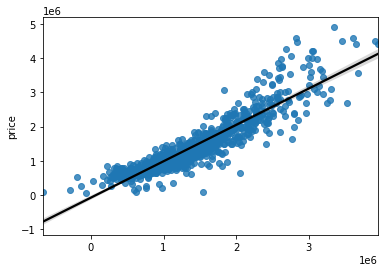

In [103]:
lr = LinearRegression()
lr.fit(vacX2_train,vacy2_train)
print(lr.score(vacX2_train,vacy2_train))
print(lr.score(vacX2_test,vacy2_test))
preds = lr.predict(vacX2_test)
sns.regplot(preds,vacy2_test,line_kws={'color':'black'})

#### Vaction-Modeling Run 3 - remove yr_built and condition

In [104]:
col_selector = ['zip','bedrooms','sqft_above','sqft_lot','floors','waterfront','greenbelt','view','grade','sqft_patio', 'bathrooms','sewer_system','heat_source','waterfront','greenbelt']
vacX3 = vacation_housedata[col_selector]
vacy = vacation_housedata['price']

vacX3_train, vacX3_test, vacy_train, vacy_test = train_test_split(vacX3, vacy, test_size=0.2)

In [105]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')

ohe_train = ohe.fit_transform(vacX3_train[['zip', 'heat_source', 'sewer_system']]).toarray()
ohe_test = ohe.transform(vacX3_test[['zip', 'heat_source', 'sewer_system']]).toarray()

ohe_train = pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = vacX3_train.index
ohe_test.index = vacX3_test.index 

vacX3_train = pd.concat([vacX3_train, ohe_train],1)
vacX3_test = pd.concat([vacX3_test, ohe_test],1)
vacX3_train

vacX3_train.drop(columns =['zip', 'heat_source', 'sewer_system'], inplace = True)
vacX3_test.drop(columns =['zip', 'heat_source', 'sewer_system'], inplace = True)

In [106]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(vacX3_train)
vacX3_standardized_train = ss.transform(vacX3_train)
vacX3_standardized_test = ss.transform(vacX3_test)

vacX3_standardized_train.mean(axis = 0)
vacX3_standardized_train.std(axis = 0)

vacX3_standardized_test.mean(axis = 0)
vacX3_standardized_test.std(axis = 0)

lr.fit(vacX3_train, vacy_train)
print(lr.score(vacX3_test,vacy_test))

0.6714110356426067


In [107]:
lr = LinearRegression()
lr.fit(vacX3_train, vacy_train)
lr.score(vacX3_train,vacy_train)
lr.score(vacX3_test,vacy_test)

0.6714110356426067

0.6805225675655048
0.6714110356426067


<AxesSubplot:ylabel='price'>

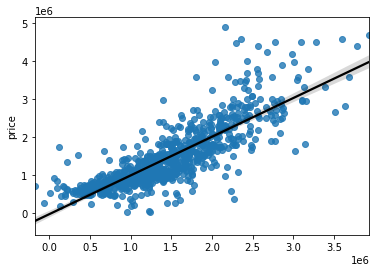

In [108]:
lr = LinearRegression()
lr.fit(vacX3_train,vacy_train)
print(lr.score(vacX3_train,vacy_train))
print(lr.score(vacX3_test,vacy_test))
preds = lr.predict(vacX3_test)
sns.regplot(preds,vacy_test,line_kws={'color':'black'})

#### Vaction-Modeling Test 4 - remove floors, bedrooms + 'EnvironmentRank'

In [109]:
col_selector = ['zip','sqft_above','sqft_lot','bathrooms','sqft_living','waterfront','greenbelt','view','grade','sqft_patio','sewer_system','heat_source','waterfront','greenbelt','EnvironmentRank']
vacX4 = vacation_housedata[col_selector]
vacy = vacation_housedata['price']

vacX4_train, vacX4_test, vacy_train, vacy_test = train_test_split(vacX4, vacy, test_size=0.2)

In [110]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')

ohe_train = ohe.fit_transform(vacX4_train[['zip', 'heat_source', 'sewer_system']]).toarray()
ohe_test = ohe.transform(vacX4_test[['zip', 'heat_source', 'sewer_system']]).toarray()

ohe_train = pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = vacX4_train.index
ohe_test.index = vacX4_test.index 

vacX4_train = pd.concat([vacX4_train, ohe_train],1)
vacX4_test = pd.concat([vacX4_test, ohe_test],1)


vacX4_train.drop(columns =['zip', 'heat_source', 'sewer_system'], inplace = True)
vacX4_test.drop(columns =['zip', 'heat_source', 'sewer_system'], inplace = True)

In [111]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(vacX4_train)
vacX4_standardized_train = ss.transform(vacX4_train)
vacX4_standardized_test = ss.transform(vacX4_test)

vacX4_standardized_train.mean(axis = 0)
vacX4_standardized_train.std(axis = 0)

vacX4_standardized_test.mean(axis = 0)
vacX4_standardized_test.std(axis = 0)

lr.fit(vacX4_train, vacy_train)
lr.score(vacX4_test,vacy_test)

0.6863677705187722

0.6838871612839512
0.6863677705187722


<AxesSubplot:ylabel='price'>

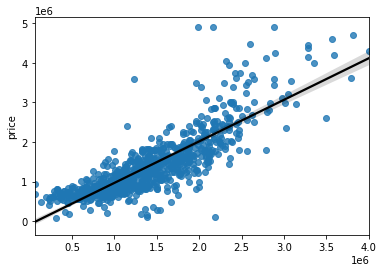

In [112]:
lr = LinearRegression()
lr.fit(vacX4_train,vacy_train)
print(lr.score(vacX4_train,vacy_train))
print(lr.score(vacX4_test,vacy_test))
preds = lr.predict(vacX4_test)
sns.regplot(preds,vacy_test,line_kws={'color':'black'})

<AxesSubplot:>

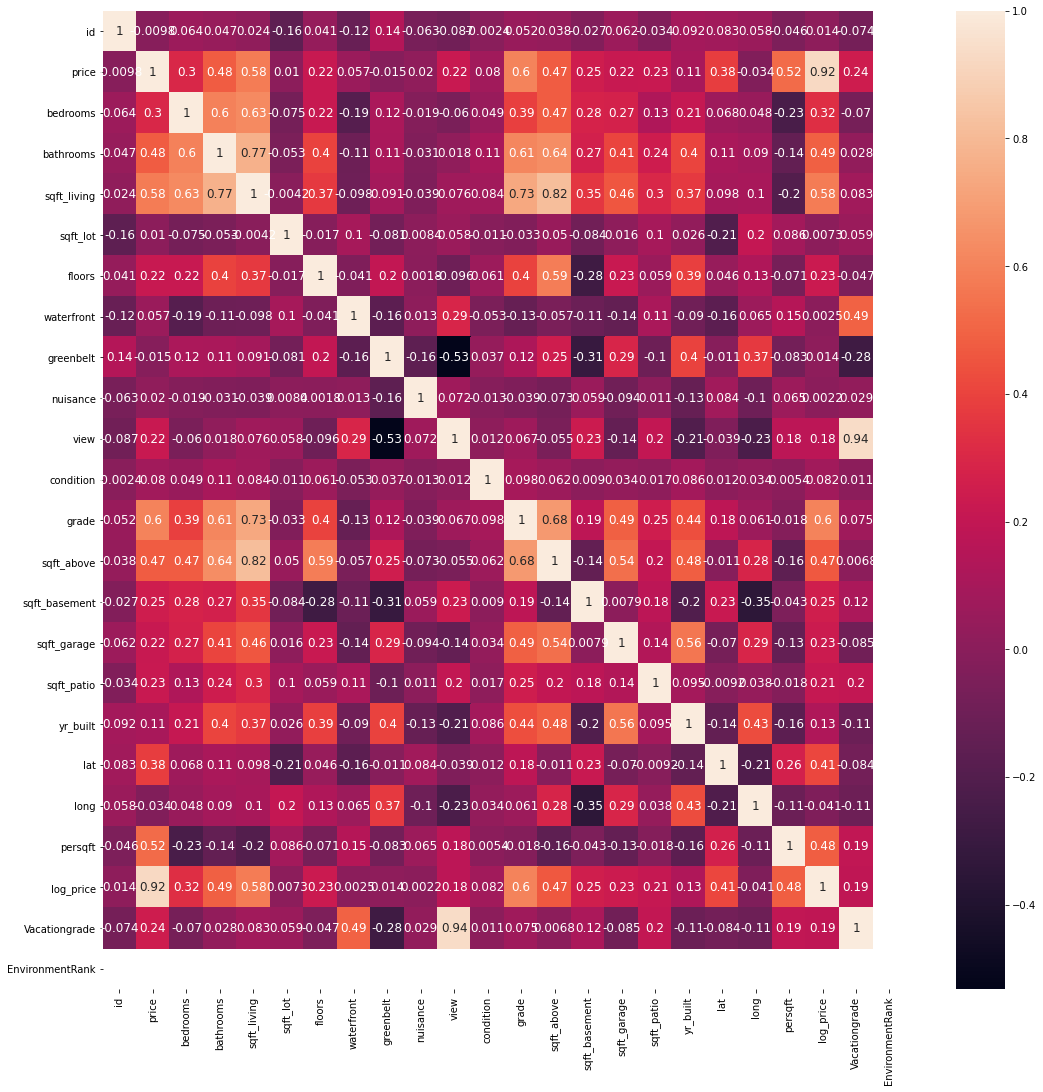

In [113]:
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(vacation_housedata.corr(),annot=True,annot_kws={'size':12})

#### Vaction-Modeling Test 5 - excluding environment rank

In [114]:
col_selector = ['zip','sqft_above','bathrooms','sqft_garage','condition','sqft_lot','waterfront','greenbelt','view','grade','sqft_patio','sewer_system','heat_source','waterfront','greenbelt','EnvironmentRank']
vacX5 = vacation_housedata[col_selector]
vacy = vacation_housedata['price']

vacX5_train, vacX5_test, vacy_train, vacy_test = train_test_split(vacX5, vacy, test_size=0.2)

In [115]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')

ohe_train = ohe.fit_transform(vacX5_train[['zip', 'heat_source', 'sewer_system']]).toarray()
ohe_test = ohe.transform(vacX5_test[['zip', 'heat_source', 'sewer_system']]).toarray()

ohe_train = pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = vacX5_train.index
ohe_test.index = vacX5_test.index 

vacX5_train = pd.concat([vacX5_train, ohe_train],1)
vacX5_test = pd.concat([vacX5_test, ohe_test],1)


vacX5_train.drop(columns =['zip', 'heat_source', 'sewer_system'], inplace = True)
vacX5_test.drop(columns =['zip', 'heat_source', 'sewer_system'], inplace = True)

In [116]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(vacX5_train)
vacX5_standardized_train = ss.transform(vacX5_train)
vacX5_standardized_test = ss.transform(vacX5_test)

vacX5_standardized_train.mean(axis = 0)
vacX5_standardized_train.std(axis = 0)

vacX5_standardized_test.mean(axis = 0)
vacX5_standardized_test.std(axis = 0)

lr.fit(vacX5_train, vacy_train)
lr.score(vacX5_test,vacy_test)

0.6568744161214908

0.6796983287165705
0.6568744161214908


<AxesSubplot:ylabel='price'>

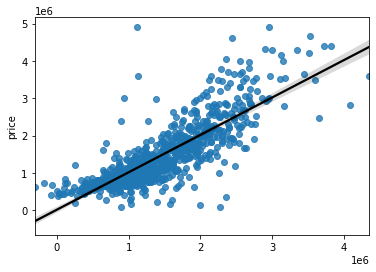

In [117]:
lr = LinearRegression()
lr.fit(vacX5_train,vacy_train)
print(lr.score(vacX5_train,vacy_train))
print(lr.score(vacX5_test,vacy_test))
preds = lr.predict(vacX5_test)
sns.color_palette("rocket", as_cmap=True)
sns.regplot(preds,vacy_test,line_kws={'color':'black'})

#### Vacation-Modeling Run 6  - all columns except id and date

In [180]:
vacation_housedata.columns 

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'address',
       'lat', 'long', 'city', 'country', 'zip', 'persqft', 'log_price',
       'Vacationgrade', 'EnvironmentRank', 'year', 'month', 'month_year'],
      dtype='object')

In [181]:
vacation_housedata['price'].median()

1295000.0

In [182]:
vacation_housedata['price'].describe().round(2)

count       3925.00
mean     1472698.02
std       809291.95
min       207333.00
25%       870000.00
50%      1295000.00
75%      1840000.00
max      4925000.00
Name: price, dtype: float64

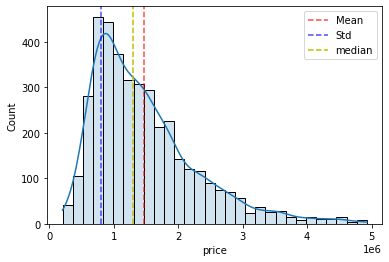

In [183]:
sequential_colors = sns.color_palette("RdPu", 10)

sns.histplot(data=vacation_housedata,x=vacation_housedata['price'],alpha=0.2,kde = True,bins=30)

plt.axvline(vacation_housedata['price'].mean(), color='r', linestyle='--', label="Mean",alpha=.7)
plt.axvline(vacation_housedata['price'].std(), color='blue', linestyle='--', label="Std",alpha=.7)
plt.axvline(vacation_housedata['price'].median(), color='y', linestyle='--', label="median")

plt.legend()

In [184]:
#reduce subset to 3992
vacation_housedata=vacation_housedata[vacation_housedata['grade']> 4]

In [185]:
#3969
vacation_housedata=vacation_housedata[vacation_housedata['price']>200000.00]
len(vacation_housedata)

3925

In [186]:
#remove condition below 2

vacation_housedata=vacation_housedata[vacation_housedata['condition']>1]

In [187]:
#combine heat_source
vacation_housedata.heat_source=vacation_housedata.heat_source.replace('Oil','Oil/Solar')
vacation_housedata.heat_source=vacation_housedata.heat_source.replace('Gas','Gas/Solar')
vacation_housedata.heat_source=vacation_housedata.heat_source.replace('Electricity','Electricity/Solar')
vacation_housedata.heat_source=vacation_housedata.heat_source.replace('Other','Electricity/Solar')

In [188]:
#combine sewer_system
vacation_housedata.sewer_system=vacation_housedata.sewer_system.replace('PRIVATE RESTRICTED','PRIVATE')
vacation_housedata.sewer_system=vacation_housedata.sewer_system.replace('PUBLIC RESTRICTED','PUBLIC')

In [189]:
col_selector = ['bedrooms', 'bathrooms',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system','sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 
       'lat', 'long', 'city', 'zip', 'persqft', 
       'Vacationgrade', 'EnvironmentRank']
vacX6 = vacation_housedata[col_selector]
vacy = vacation_housedata['price']

vacX6_train, vacX6_test, vacy_train, vacy_test = train_test_split(vacX6, vacy, test_size=0.2)

In [190]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')

ohe_train = ohe.fit_transform(vacX6_train[['city','zip', 'heat_source', 'sewer_system']]).toarray()
ohe_test = ohe.transform(vacX6_test[['city','zip', 'heat_source', 'sewer_system']]).toarray()

ohe_train = pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

ohe_train.index = vacX6_train.index
ohe_test.index = vacX6_test.index 

vacX6_train = pd.concat([vacX6_train, ohe_train],1)
vacX6_test = pd.concat([vacX6_test, ohe_test],1)


vacX6_train.drop(columns =['city','zip', 'heat_source', 'sewer_system'], inplace = True)
vacX6_test.drop(columns =['city','zip', 'heat_source', 'sewer_system'], inplace = True)

In [191]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(vacX6_train)
vacX6_standardized_train = ss.transform(vacX6_train)
vacX6_standardized_test = ss.transform(vacX6_test)

vacX6_standardized_train.mean(axis = 0)
vacX6_standardized_train.std(axis = 0)

vacX6_standardized_test.mean(axis = 0)
vacX6_standardized_test.std(axis = 0)

lr.fit(vacX6_train, vacy_train)
lr.score(vacX6_test,vacy_test)

0.8318479602164723

0.8330073212947154
0.8318479602164723


<Figure size 1800x360 with 0 Axes>

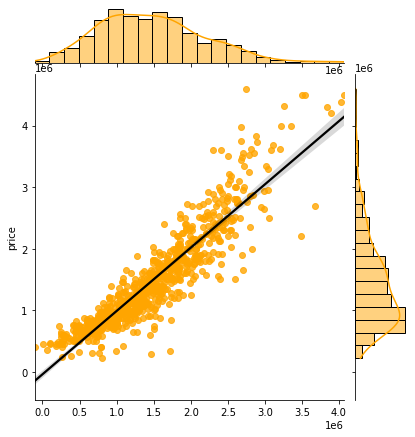

In [192]:
lr = LinearRegression()
lr.fit(vacX6_train,vacy_train)
print(lr.score(vacX6_train,vacy_train))
print(lr.score(vacX6_test,vacy_test))
preds = lr.predict(vacX6_test)
plt.figure(figsize=(25,5))
sns.jointplot(preds,vacy_test, kind='reg', color='Orange',line_kws={'color':'black'})


## Model Testing 6 Achieved best score - visualization

In [131]:
modellist=list(zip(lr.coef_,vacX2_train.columns))
#lr.fit(vacX2_train, vacy2_train)
#lr.score(vacX2_train,vacy2_train)
#lr.score(vacX2_test,vacy2_test)
modellist

[(52916.760262331794, 'bedrooms'),
 (86801.69340594616, 'bathrooms'),
 (0.0700135637670769, 'sqft_lot'),
 (-80265.08094925089, 'floors'),
 (118572.8738786928, 'waterfront'),
 (-13302.098714899757, 'greenbelt'),
 (-24759.166365907276, 'nuisance'),
 (-27906.283468189962, 'view'),
 (13022.83721379617, 'condition'),
 (124429.0608942358, 'grade'),
 (371.57467980524143, 'sqft_above'),
 (219.0900064820762, 'sqft_basement'),
 (-114.81030628504232, 'sqft_garage'),
 (67.22693765604345, 'sqft_patio'),
 (-883.6548278832943, 'yr_built'),
 (-74574.37760108912, 'lat'),
 (-295826.6958734514, 'long'),
 (1169.979215307696, 'persqft'),
 (77364.49155036881, 'x0_98001'),
 (5.209585651755333e-09, 'x0_98002'),
 (-281710.38206275227, 'x0_98003'),
 (143149.950866528, 'x0_98004'),
 (1731.6791892934089, 'x0_98005'),
 (53900.669082951106, 'x0_98006'),
 (-120583.24041614066, 'x0_98007'),
 (215052.0831083275, 'x0_98008'),
 (522472.05800976563, 'x0_98010'),
 (-121852.51421577125, 'x0_98011'),
 (-272461.73077469296, 

In [132]:
coeflist=pd.DataFrame(modellist,columns=['Coef',"Feature"])

In [133]:
#analysis of results for general features
ptfeature_general=coeflist.iloc[0:19]

In [134]:
#analysis of results for general features
selected=['bedrooms','bathrooms','grade','waterfront','view','greenbelt','nuisance','yr_built']

In [135]:
#analysis of results for general features
ppt=ptfeature_general['Feature'].isin(selected)

In [136]:
#analysis of results for general features
download=ptfeature_general[ppt]
download.to_csv(f'feature1.csv')

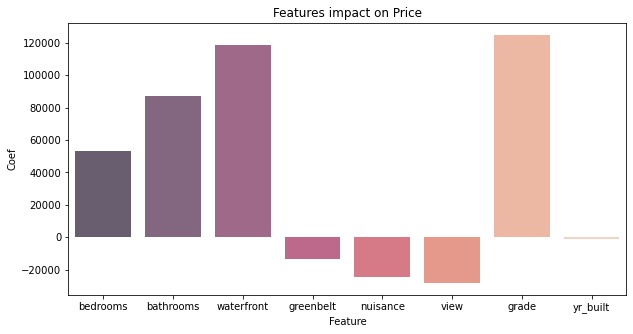

In [139]:
#analysis of results for general features - visualization

plt.figure(figsize=(10,5))
sns.barplot(data=ptfeature_general[ppt],y='Coef',x='Feature',alpha=0.7,palette='rocket')
plt.title("Features impact on Price")
plt.show()

In [140]:
selected=['bedrooms','bathrooms','grade','waterfront','view','greenbelt','nuisance','yr_built']

In [141]:
coeflist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Coef     138 non-null    float64
 1   Feature  138 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [142]:
coeflist=pd.DataFrame(modellist,columns=['Coef',"Feature"])

In [143]:
#analysis of price results for city - visualization

coecity=coeflist.iloc[106:140]

In [153]:
coecity.Feature=coeflist.Feature.apply(lambda x: x.replace("x3_",""))

In [154]:
coecity

,Coef,Feature
106,-127369.642704,Auburn
107,-89537.038248,Baring
108,-126351.614541,Bellevue
109,99552.318528,Black Diamond
110,291051.391187,Bothell
111,88988.431760,Burien
112,-71351.026862,Carnation
113,-6706.308358,Clyde Hill
114,-52607.759254,Covington
115,118602.508332,Dash Point


In [156]:
coecity=coecity.rename(columns = {'Feature':'City'})

In [157]:
worstcity=coecity.sort_values('Coef', ascending=False).tail(5)

In [158]:
bestcity=coecity.sort_values('Coef', ascending=False).head(5)

In [ ]:
bestcity=bestcity.append(worstcity,ignore_index=True)

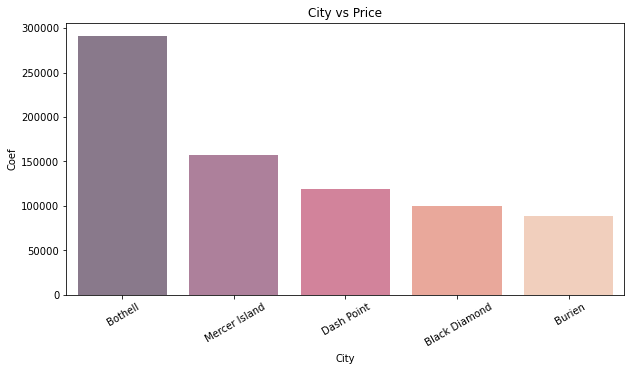

In [159]:
#analysis of results for general features - visualization

plt.figure(figsize=(10,5))
sns.barplot(data=bestcity,y='Coef',x='City',palette='rocket',alpha=.6)
plt.title("City vs Price")

plt.xticks(rotation=30)
plt.show()

In [160]:
#heat_source and sewer system
coeflist

,Coef,Feature
0,52916.760262,bedrooms
1,86801.693406,bathrooms
2,0.070014,sqft_lot
3,-80265.080949,floors
4,118572.873879,waterfront
...,...,...
133,9053.327480,Normandy Park
134,23497.645690,North Bend
135,-32550.973170,Preston
136,-4251.335852,Ravensdale


In [161]:
#heat_source and sewer system analysis
ptfeature_heat_sewer=coeflist.iloc[95:106]
ptfeature_heat_sewer

,Coef,Feature
95,-5066.085892,Electricity
96,-5058.656677,Electricity/Solar
97,-110810.231147,Gas
98,-187444.962183,Gas/Solar
99,178485.348797,Oil
100,150872.359736,Oil/Solar
101,263156.738503,Other
102,-124575.001485,PRIVATE
103,37378.658315,PRIVATE RESTRICTED
104,-31808.593202,PUBLIC


In [163]:
ptfeature_heat_sewer.Feature=ptfeature_heat_sewer.Feature.apply(lambda x: x.replace("x1_","").replace('x2_',""))

In [164]:


addlist=['heat','heat','heat','heat','heat','heat','heat','sewer','sewer','sewer','sewer']

In [165]:
ptfeature_heat_sewer['type']=np.array(addlist)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Electricity'),
  Text(1, 0, 'Electricity/Solar'),
  Text(2, 0, 'Gas'),
  Text(3, 0, 'Gas/Solar'),
  Text(4, 0, 'Oil'),
  Text(5, 0, 'Oil/Solar'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'PRIVATE'),
  Text(8, 0, 'PRIVATE RESTRICTED'),
  Text(9, 0, 'PUBLIC'),
  Text(10, 0, 'PUBLIC RESTRICTED')])

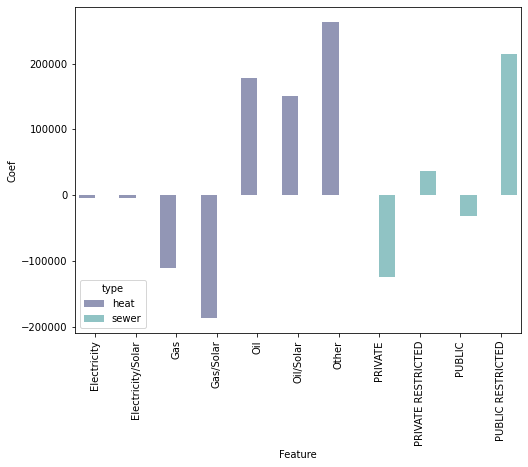

In [166]:
plt.figure(figsize=(8,6))
sns.barplot(x=ptfeature_heat_sewer['Feature'],y=ptfeature_heat_sewer['Coef'],hue=ptfeature_heat_sewer['type'],palette='mako',alpha=.6)
plt.xticks(rotation=90)

In [167]:
zipinfo=vacation_housedata.groupby('zip')['price','bedrooms'].mean().round(2)

In [168]:
zipinfo

,price,bedrooms
zip,,
98001,772100.41,3.51
98002,731390.00,3.20
98003,899564.10,3.51
98004,3366861.78,4.02
98005,2054548.73,3.92
...,...,...
98199,1854607.97,3.43
98270,2375000.00,4.00
98271,2750000.00,3.00


In [170]:
zipinfo

,price,bedrooms
zip,,
98001,772100.41,3.51
98002,731390.00,3.20
98003,899564.10,3.51
98004,3366861.78,4.02
98005,2054548.73,3.92
...,...,...
98199,1854607.97,3.43
98270,2375000.00,4.00
98271,2750000.00,3.00


In [174]:
vacation_housedata['year']=pd.DatetimeIndex(vacation_housedata['date']).year
vacation_housedata['year']

1        2021
2        2021
3        2021
6        2021
9        2021
         ... 
30098    2021
30114    2022
30120    2021
30145    2021
30151    2021
Name: year, Length: 3925, dtype: int64

In [175]:
vacation_housedata['month']=pd.DatetimeIndex(vacation_housedata['date']).month
vacation_housedata['month']

1        12
2         9
3        12
6        11
9         6
         ..
30098     8
30114     2
30120     8
30145    12
30151     6
Name: month, Length: 3925, dtype: int64

In [176]:
vacation_housedata['month_year'] = pd.to_datetime(vacation_housedata['date']).dt.to_period('M')
vacation_housedata['date']=vacation_housedata['date'].sort_values(ascending=True)


In [177]:
vacation_housedata['month_year']=vacation_housedata['month_year'].astype(str)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

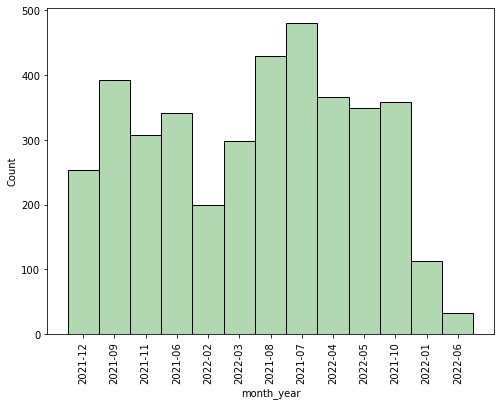

In [178]:
plt.figure(figsize=(8,6))
sns.histplot(data=vacation_housedata,x=vacation_housedata['month_year'],color='green',alpha=.3)
plt.xticks(rotation=90)

In [ ]:
#failed to create a map..
import folium
home_locations = finalmapdata[['long','lat','price']]
map = folium.Map(location =[finalmapdata.lat.mean(),finalmapdata.long.mean()],zoom_start=8,control_scale =False)
for x, location_info in finalmapdata.iterrows():
folium.Marker([location_info["lat"], location_info["long"]], popup=location_info['price']).add_to(map)
display(map)